In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [9]:
# Teste da matriz da questao 2

a_res = [-1, 0 ,1]
b = 1
c_res = [0, 1]
d_res = [-1, 0, 1]
e = 1

In [10]:
# Calcula tdoas as possibilidades da matriz dada.

poss = []
for a_item in a_res:
    a = a_item
    for d_item in d_res:
        d = d_item
        for c_item in c_res:
            c = c_item
            poss.append( [[0, a, 0, 0, 1],
                          [-1, 0, 0, 0, b],
                          [0, 1, c, 1, -1],
                          [d, 0, 1, 0, 0],       
                          [1, -1, 0, e, 0]])

In [11]:
# Funcao que calcula o o proximo estado
# usando a multiplicacao da matriz de 
# interacao com um vetor de estado atuais

def prox_est(inter_matrix,lista):    
    x = np.array([lista])
    y = np.matmul(x,inter_matrix)
    z = []
    for i in range(0, len(y[0])):
        if y[0][i] > 0:
            z.append(1)
        if y[0][i] < 0:
            z.append(0)
        if y[0][i] == 0:
            z.append(x[0][i])
        

    return z

In [12]:
# O vetor com as possibilidades de estado
# pode ser representado como um numero em binario.
# Como sao 5 genes com 2 possibilidades temos
# que ter 2**5 = 32 numeros. Ou de 0 à 31.

def listas(n):
    listas = []
    for i in range(n):
        listas.append(list(bin(i)[2:]))
    for i in listas:
        while len(i) < 5:
            i.insert(0,'0')
    return listas      
todos = []
for i in listas(32):
    i = [int(x) for x in i]
    todos.append(i)

In [13]:
# Cria uma lista com todas as possibilidades
# de vetor de entrada e a respectiva saída

tds_poss_trans = []
for i in poss:
    cc = []
    for p in todos:
        x = ''.join(str(e) for e in p)
        y = ''.join(str(e) for e in prox_est(np.array(i).T,p))
        cc.append((x,y))
    tds_poss_trans.append(cc)

In [14]:
# Calculo da quantidade de arestas de cada 
# possibilidade de matriz

dict_poss = {}
a = 0
for i in tds_poss_trans:
    zz = []
    for item in i:
        zz.append(item)
    dict_poss[f'{a}'] = zz
    a += 1
for matrix, trns in dict_poss.items():
    cnt = 0
    for state, trn in trns:
        if state != trn:
            cnt += 1
    print(matrix, ':', cnt)

0 : 24
1 : 23
2 : 24
3 : 24
4 : 26
5 : 26
6 : 25
7 : 24
8 : 25
9 : 25
10 : 27
11 : 27
12 : 26
13 : 25
14 : 26
15 : 26
16 : 28
17 : 28


0


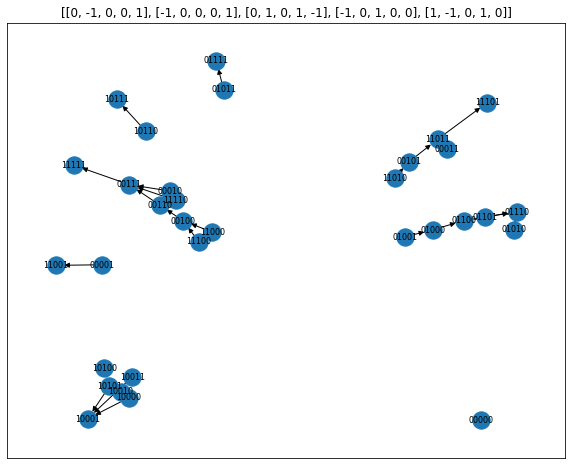

1


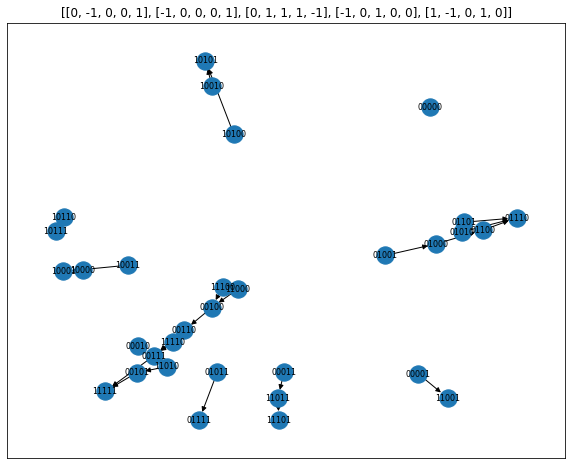

2


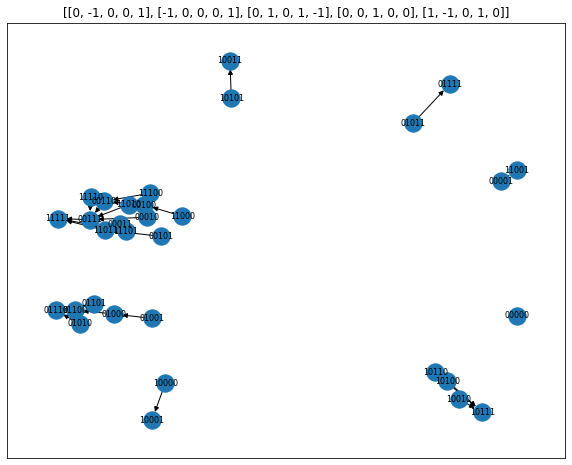

3


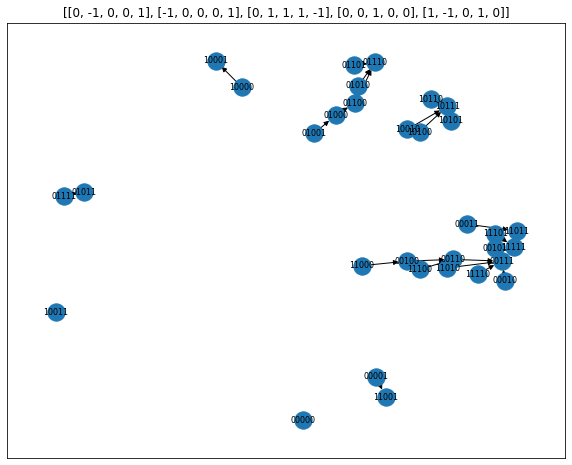

4


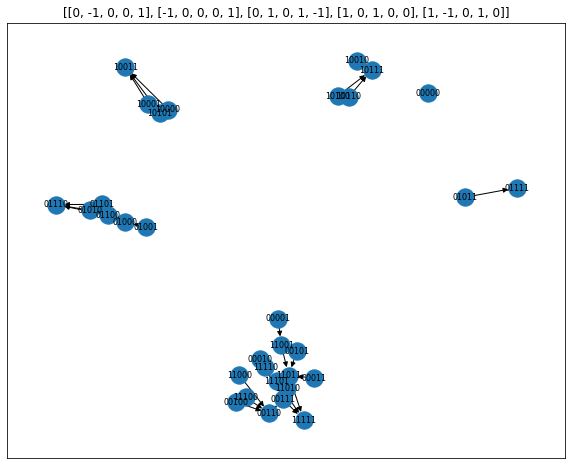

5


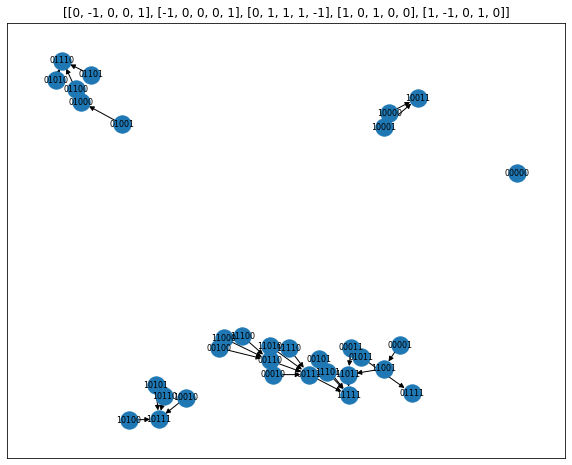

6


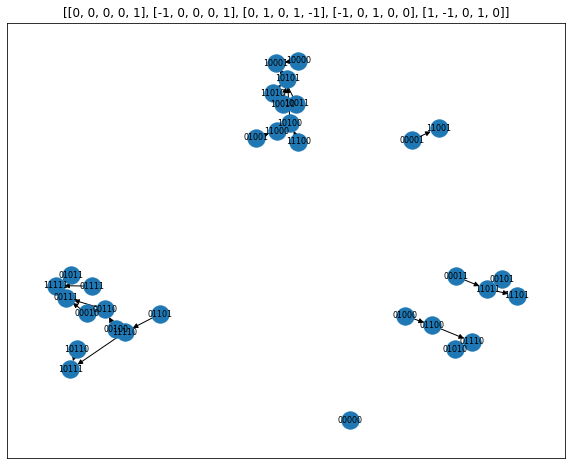

7


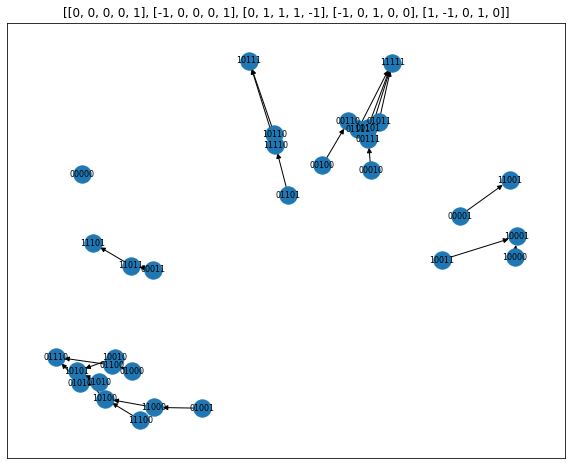

8


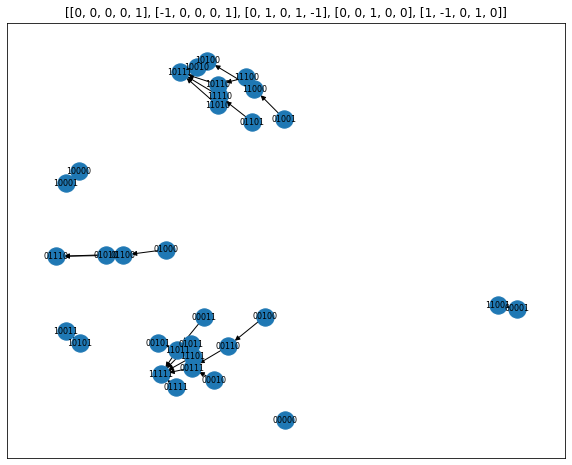

9


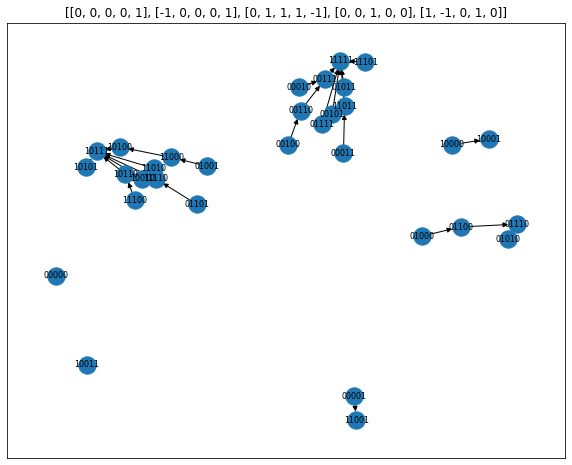

10


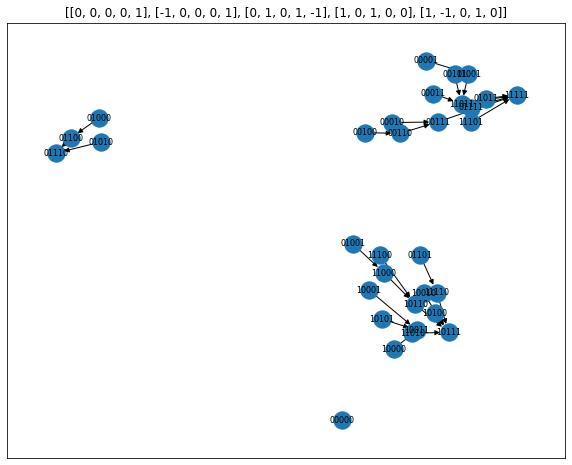

11


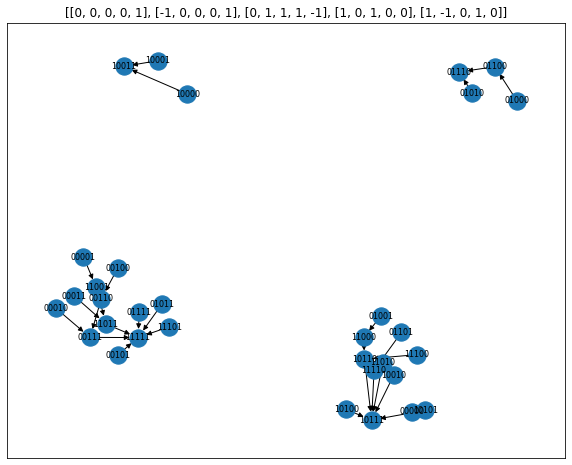

12


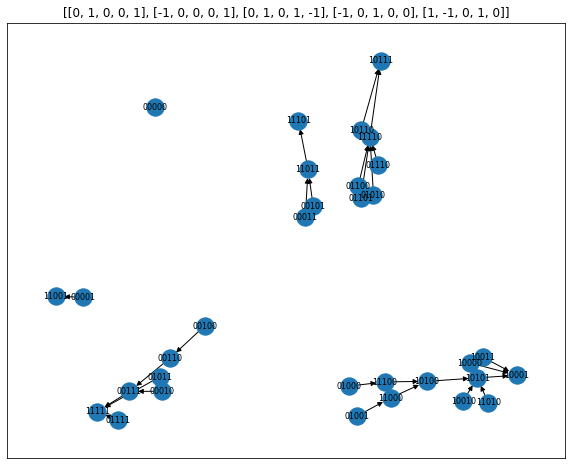

13


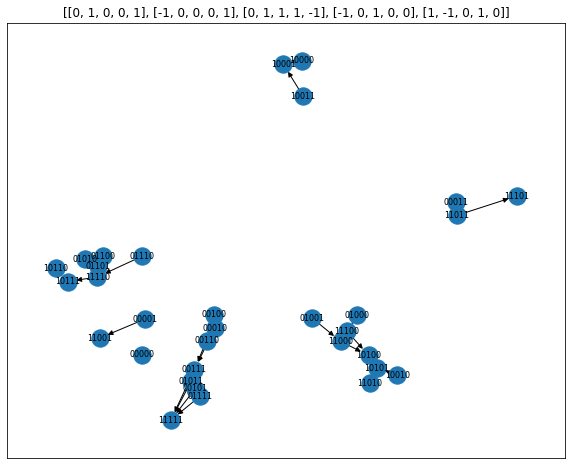

14


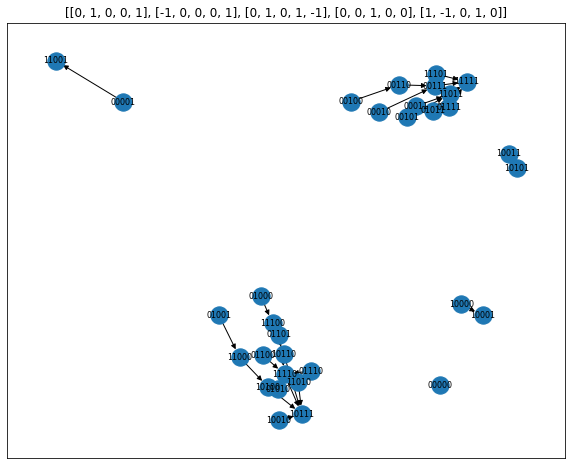

15


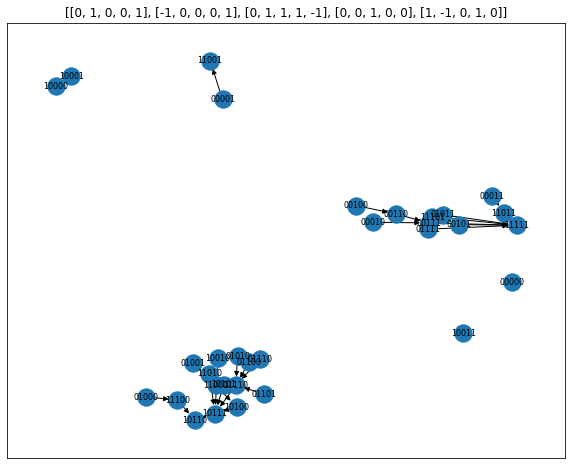

16


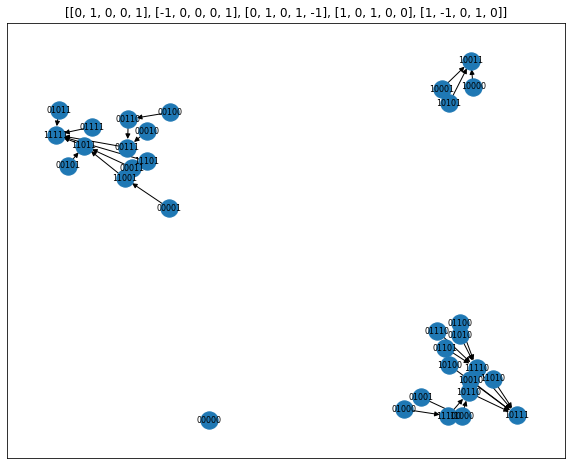

17


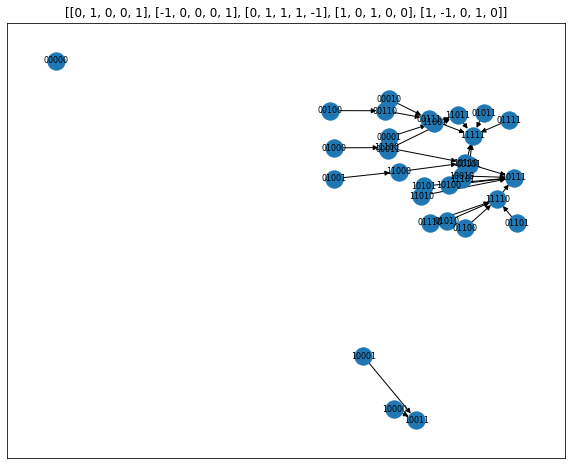

In [15]:
for matrix, trns in dict_poss.items():
    prox = []
    for state, trn in trns:
        a = (state, trn)
        prox.append(a)
    print(matrix)
    G = nx.DiGraph()
    G.add_edges_from(prox)
    pos = nx.spring_layout(G)
    plt.figure(3,figsize=(10,8)) 
    plt.title(poss[int(matrix)])
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos,font_size=8)
    nx.draw_networkx_edges(G, pos, arrows=True)
    plt.show()

In [16]:
seq = [('00100','00110'),('00110','00111'),('00111','11111'),('11111',('11111'))]


In [17]:
# Verifica quantos estados da sequencia passada
# pelo exercicio estao nas sequencias de estado
# geradas

for matrix, trns in dict_poss.items():
    zz = 0
    for state, trn in trns:
        for item in seq:
            if item == (state, trn):
                zz += 1
    print(matrix, ' ', zz)
    
# Aparentemente ela esta contida em todas as possibilidades
# de sequencais de estado         

0   4
1   4
2   4
3   4
4   4
5   4
6   4
7   4
8   4
9   4
10   4
11   4
12   4
13   4
14   4
15   4
16   4
17   4
